#### Adding shots to slices

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def add_shot(slice, x, y, size, metal):
    """
    Adds a shot to an image (Numpy Array)
    """
    metal_to_AC = {"lead": 30.32, "steel": 7.938406}
    if x+size > slice.shape[1] or y+size > slice.shape[0]:
        raise Exception(f"Bullet of specified dimensions will be out of bounds.\nplank size: {slice.shape}") 
    slice[y:y+size, x:x+size] = metal_to_AC[metal]
    return slice


def convert_to_ac(grayscale_im):
    """
    Converts a grayscale image (Numpy array) to an array of attenuation coefficients

    """
    grayScaleToAttCoeff = lambda x: (x/255)*np.max(grayscale_im)
    cFunc = np.vectorize(grayScaleToAttCoeff)
    return cFunc(grayscale_im)

##### Adding shots to slices in first plank

- 1st plank:
    - ring width = 30
    - angle = 0
    - blur = 5
    - 1st slice: 1 lead (63, 463), size = 2mmx2mm


Examining slice:

Shape of image: (500, 500)


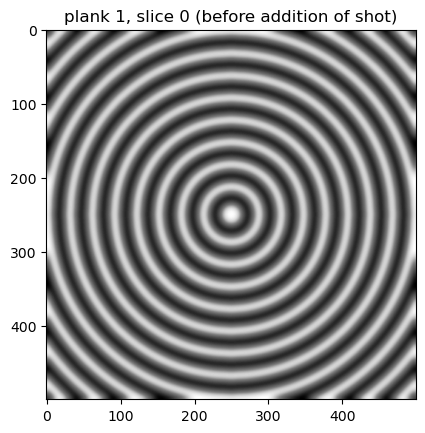

Mean value of attenuation coefficients in the tree: 0.19455798635294114


In [47]:
path_to_slice = "validation-data\plank1\slice0.png"

#img = imread(path_to_slice)
img = Image.open(path_to_slice)

# Convert the image to grayscale
img = img.convert('L')
im_array = np.array(img)

# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

print(f"Shape of image: {im_array.shape}")
plt.imshow(im_AC, cmap="gray")
plt.title("plank 1, slice 0 (before addition of shot)")
plt.show()
print(f"Mean value of attenuation coefficients in the tree: {np.mean(im_AC)}")


Inserting shot to slice

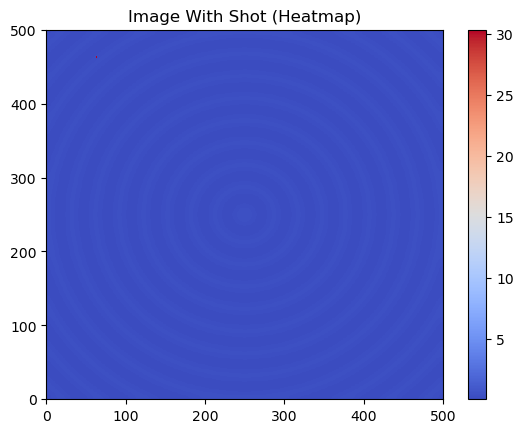

(500, 500)

In [48]:
im_with_shot = add_shot(im_AC, 63, 463, 2, "lead")
# Examining new slice
heatmap = plt.pcolor(im_with_shot, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Image With Shot (Heatmap)")
plt.show()

im_with_shot.shape

#### Saving image with shot

In [49]:
filepath = "validation-data/plank1/slice0-withshot.png"
plt.imsave(filepath, im_with_shot)

# Plank 2

Shots to be added:
- Slice 5: 3 steel
    - Steel:
        - 305, 392 - 3mm
        - 442, 255 - 4mm
        - 246, 82 - 5mm

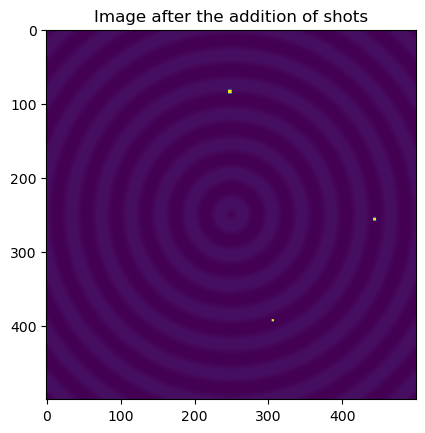

In [52]:
path_to_slice = "validation-data\plank2\slice4.png"

#img = imread(path_to_slice)
img = Image.open(path_to_slice)

# Convert the image to grayscale
img = img.convert('L')
im_array = np.array(img)

# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

im_with_shots = add_shot(im_AC, 305, 392, 3, "steel")
im_with_shots = add_shot(im_with_shots, 442, 255, 4, "steel")
im_with_shots = add_shot(im_with_shots, 246, 82, 5, "steel")

plt.imshow(im_with_shots)
plt.title("Image after the addition of shots")
plt.show()



In [53]:
# Saving image
filepath = "validation-data/plank2/slice4-withshot.png"
plt.imsave(filepath, im_with_shots)


# Plank 3

Shots to be added:
- 2nd slice:
    - 1 lead (83, 376): 3mm
- 3rd slice:
    - 2 steel:
        - (84, 81): 2mm
        - (150, 280): 4mm
    - 2 lead:
        - (364, 416): 2mm
        - (79, 182): 1mm
        

In [54]:
# Adding shot to 2nd slice

path_to_slice = "validation-data\plank3\slice1.png"

#img = imread(path_to_slice)
img = Image.open(path_to_slice)

# Convert the image to grayscale
img = img.convert('L')
im_array = np.array(img)

# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

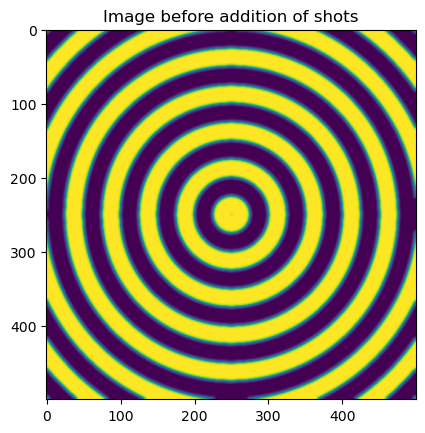

In [55]:
# Checking image
plt.imshow(im_AC)
plt.title("Image before addition of shots")
plt.show()

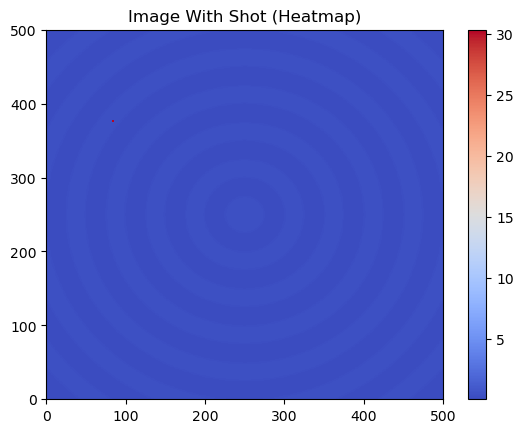

In [56]:
# Adding shots
im_with_shots = add_shot(im_AC, 83, 376, 3, "lead")

# Checking image
heatmap = plt.pcolor(im_with_shots, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Image With Shot (Heatmap)")
plt.show()

In [57]:
path_to_slice = "validation-data\plank3\slice1-withshots.png"
plt.imsave(path_to_slice, im_with_shots)

##### Slice 3
- Steel:
    - 84, 81: 2mm
    - 150, 280: 6mm
- Lead:
    - 364, 416: 3mm
    - 290, 287: 4mm


In [58]:
path_to_slice = "validation-data\plank3\slice2.png"

#img = imread(path_to_slice)
img = Image.open(path_to_slice)

# Convert the image to grayscale
img = img.convert('L')
im_array = np.array(img)

# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

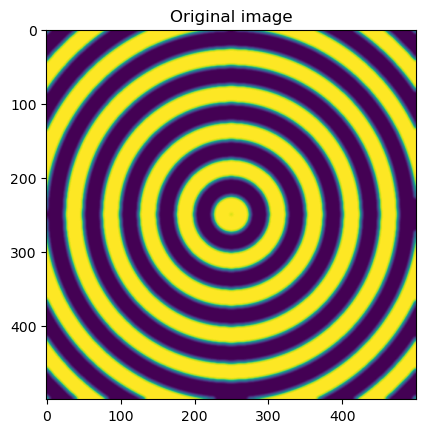

In [59]:
plt.imshow(im_AC)
plt.title("Original image")
plt.show()

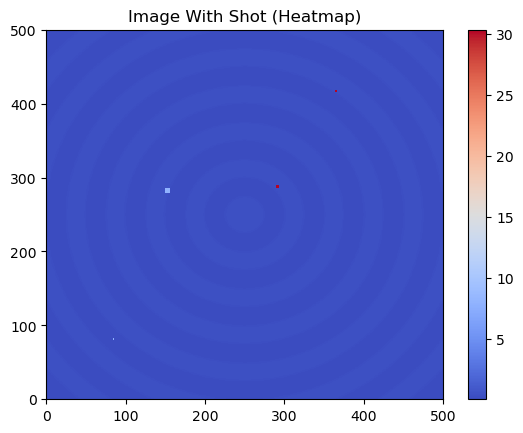

In [61]:
# Adding shots

im_with_shots = add_shot(im_AC, 84, 81,2, "steel")
im_with_shots = add_shot(im_with_shots, 150, 280,6, "steel")
im_with_shots = add_shot(im_with_shots, 364, 416,3, "lead")
im_with_shots = add_shot(im_with_shots, 290, 287,4, "lead")
# Checking image
heatmap = plt.pcolor(im_with_shots, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Image With Shot (Heatmap)")
plt.show()

In [62]:
# Saving image
filepath = "validation-data\plank3\slice2-withshots.png"
plt.imsave(filepath, im_with_shots)

# 4th (final) plank

#### slice0
- 2 lead:
    - 476, 41: 1mm
    - 449, 291: 2mm
- 1 steel:
    - 184, 57: 2mm

In [69]:
path_to_slice = "validation-data\plank4\slice0.png"

#img = imread(path_to_slice)
img = Image.open(path_to_slice)

# Convert the image to grayscale
img = img.convert('L')
im_array = np.array(img)

# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

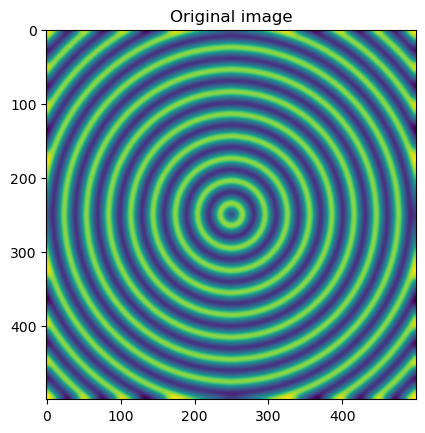

In [70]:
# Checking image

plt.imshow(im_AC)
plt.title("Original image")
plt.show()

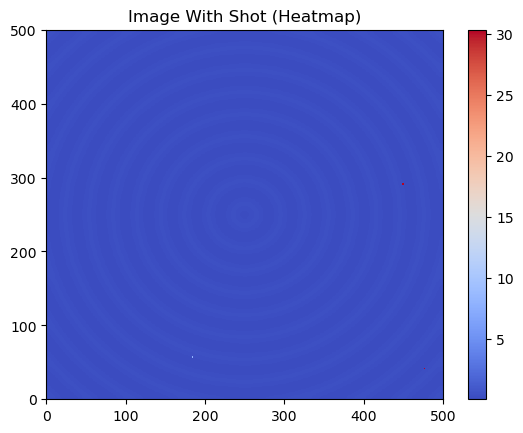

In [71]:
im_with_shots = add_shot(im_AC, 476, 41, 2, "lead")
im_with_shots = add_shot(im_with_shots, 449, 291, 2, "lead")
im_with_shots = add_shot(im_with_shots, 184, 57, 2, "steel")

# Checking image
heatmap = plt.pcolor(im_with_shots, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Image With Shot (Heatmap)")
plt.show()

In [72]:
# Saving
plt.imsave("validation-data\plank4\slice0-withshots.png", im_with_shots)

#### Slice 4
- Steel:
    - (457, 306) 5mm
    - (95, 120) 3mm

In [73]:
path_to_slice = "validation-data\plank4\slice4.png"

#img = imread(path_to_slice)
img = Image.open(path_to_slice)

# Convert the image to grayscale
img = img.convert('L')
im_array = np.array(img)

# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

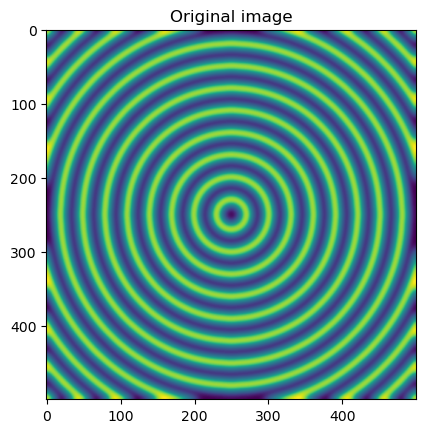

In [74]:
# Checking image

plt.imshow(im_AC)
plt.title("Original image")
plt.show()

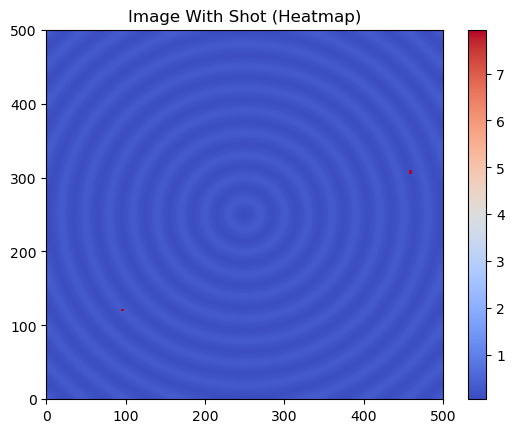

In [76]:
im_with_shots = add_shot(im_AC, 457, 306, 5, "steel")
im_with_shots = add_shot(im_with_shots, 95, 120, 3, "steel")

# Checking image
heatmap = plt.pcolor(im_with_shots, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Image With Shot (Heatmap)")
plt.show()

In [77]:
# Saving
plt.imsave("validation-data\plank4\slice4-withshots.png", im_with_shots)